In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
import torch

In [3]:
import pickle

In [4]:
%matplotlib inline

In [5]:
regex = re.compile(r'\d+')

In [6]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/'

In [7]:
model_names = os.listdir(saved_models)

In [50]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [46]:
fnames_25, epochs_25 = get_fnames(25)

In [47]:
fnames_25

array(['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_55epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_60epochs_0.25coeff_mask.pkl',
       'Trained_rUNet_pytorch_6positions_dataset_65ep

In [17]:
from functools import partial

In [18]:
root_path = partial(os.path.join, saved_models)

In [22]:
losses_25 = [(p, torch.load(p)['val_loss']) for p in map(lambda f: root_path(f), fnames_25)]

In [23]:
len(losses_25)

20

In [24]:
min(losses_25, key=lambda e: e[1])

('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_75epochs_0.25coeff_mask.pkl',
 0.0017157481914317166)

In [25]:
best_models = []

In [26]:
coeffs = [25, 3, 4, 5, 6, 7, 75]

In [27]:
for c in coeffs:
    fnames, _ = get_fnames(c)
    losses_c = [(p, torch.load(p)['val_loss']) for p in map(lambda f: root_path(f), fnames)]
    best_models.append(min(losses_c, key=lambda e: e[1]))

In [28]:
best_models

[('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_75epochs_0.25coeff_mask.pkl',
  0.0017157481914317166),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_95epochs_0.3coeff_mask.pkl',
  0.0011772671851859842),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_95epochs_0.4coeff_mask.pkl',
  0.0003796403805069901),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_220epochs_0.5coeff_mask.pkl',
  -1.8720721763437957e-05),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_150epochs_0.6coeff_mask.pkl',
  -0.00023187725202189068),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_240epochs_0.7coeff_mask.pkl',
  -0.0003816395695105678),
 ('/storage/yw18581

In [29]:
best_models_path = [e[0] for e in best_models]

In [30]:
best_models_path

['/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_75epochs_0.25coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_95epochs_0.3coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_95epochs_0.4coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_220epochs_0.5coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_150epochs_0.6coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_240epochs_0.7coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/Trained_rUNet_pytorch_6positions_dataset_240epochs_0.75coeff_mask.pkl']

In [31]:
m = best_models_path[0]

In [59]:
ep = int(regex.findall(os.path.split(m)[1].split('_')[5])[0])

In [52]:
coef = int(regex.findall(os.path.split(m)[1].split('_')[6])[1])

In [54]:
fnames_c, epochs_c = get_fnames(coef, 'predicted_unseen')

In [68]:
predicted_path = root_path(fnames_c[np.where(epochs_c==ep)[0]][0])

In [70]:
predicted_path

'/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/predicted_unseen_6positions_75epochs_0.25coeff.npz'

In [75]:
preds = np.load(predicted_path)

In [76]:
y_true, y_pred = preds['true'], preds['pred']

In [77]:
mean_squared_error(y_true, y_pred)

0.10308463794512311

In [78]:
def mse(model_path, dataset='predicted_unseen'):
    ep = int(regex.findall(os.path.split(model_path)[1].split('_')[5])[0])
    coef = int(regex.findall(os.path.split(model_path)[1].split('_')[6])[1])
    fnames_c, epochs_c = get_fnames(coef, dataset)
    predicted_path = root_path(fnames_c[np.where(epochs_c==ep)[0]][0])
    preds = np.load(predicted_path)
    y_true, y_pred = preds['true'], preds['pred']
    return mean_squared_error(y_true, y_pred) 

In [82]:
errors = []
for m in best_models_path:
    err_unseen = mse(m, dataset='predicted_unseen')
    err_testdata = mse(m, dataset='predicted_testdata')
    errors.append((err_testdata, err_unseen))

In [83]:
errors

[(0.00244082533539985, 0.10308463794512311),
 (0.0020107330240017414, 0.1774670814246483),
 (0.0011753295240058616, 0.21386777147945535),
 (0.0005651479752778375, 0.17234146013531304),
 (0.0003357317090362244, 0.19355919241422623),
 (0.0001914004812364988, 0.232367532129365),
 (0.0003937070078492603, 0.35063262049305044)]

In [86]:
delta=[abs(e[1]-e[0]) for e in errors]

In [87]:
delta

[0.10064381260972326,
 0.17545634840064656,
 0.21269244195544948,
 0.1717763121600352,
 0.19322346070519,
 0.2321761316481285,
 0.3502389134852012]

In [88]:
def idx_mse(dist, true_arr, preds_arr):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [89]:
distances_unseen = [1,3,15,30]
distances_testdata = [2,4,10,20,25,35]

In [ ]:
idx = idx_mse(dist, preds_arr=preds, true_arr=true)[0]
y_true = true[idx]
y_pred = preds[idx]

In [96]:
ms = [idx_mse(d, preds_arr=y_pred, true_arr=y_true) for d in distances_unseen]

1 0.278899498331263
3 0.010327922770007679
15 0.0034237725042213342
30 0.1126790730284362


In [130]:
def mse_positions(model_path, dataset='predicted_unseen', dist=distances_unseen):
    mse=[]
    avg=[]
    std=[]
    ep = int(regex.findall(os.path.split(model_path)[1].split('_')[5])[0])
    coef = int(regex.findall(os.path.split(model_path)[1].split('_')[6])[1])
    fnames_c, epochs_c = get_fnames(coef, dataset)
    predicted_path = root_path(fnames_c[np.where(epochs_c==ep)[0]][0])
    print(predicted_path)
    preds = np.load(predicted_path)
    y_true, y_pred = preds['true'], preds['pred']
    for d in dist:
        idx = idx_mse(d, preds_arr=y_pred, true_arr=y_true)[0]
        y_true_d = y_true[idx]
        y_pred_d = y_pred[idx]
        mse_d = mean_squared_error(y_true_d, y_pred_d)
        avg_pred = np.mean(y_pred_d)
        std_pred = np.std(y_pred_d)
        mse.append(mse_d)
        avg.append(avg_pred)
        std.append(std_pred)
    return mse, avg, std

In [131]:
mse_unseen, avg_unseen, std_unseen = mse_positions(best_models_path[0])

/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/predicted_unseen_6positions_75epochs_0.25coeff.npz
1 0.278899498331263
3 0.010327922770007679
15 0.0034237725042213342
30 0.1126790730284362


In [132]:
mse_test, avg_test, std_test = mse_positions(best_models_path[0], dataset='predicted_testdata', dist=distances_testdata)

/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/predicted_testdata_6positions_75epochs_0.25coeff.npz
2 0.002366969050277881
4 0.0025148988993237255
10 0.002323545615278514
20 0.0026421040368245358
25 0.002154523576910319
35 0.002639872570517068


In [133]:
mse_unseen

[0.278899498331263,
 0.010327922770007679,
 0.0034237725042213342,
 0.1126790730284362]

In [125]:
distances = distances_unseen+distances_testdata

In [128]:
errs = mse_unseen+mse_test

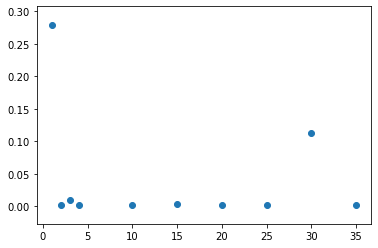

In [129]:
plt.scatter(distances, errs)

In [134]:
avg_unseen

[1.5259233, 2.992582, 15.035305, 30.330933]

In [135]:
avg_test

[1.9818835, 3.9869297, 9.974406, 19.98534, 24.999182, 35.014633]

In [136]:
avg = avg_unseen+avg_test

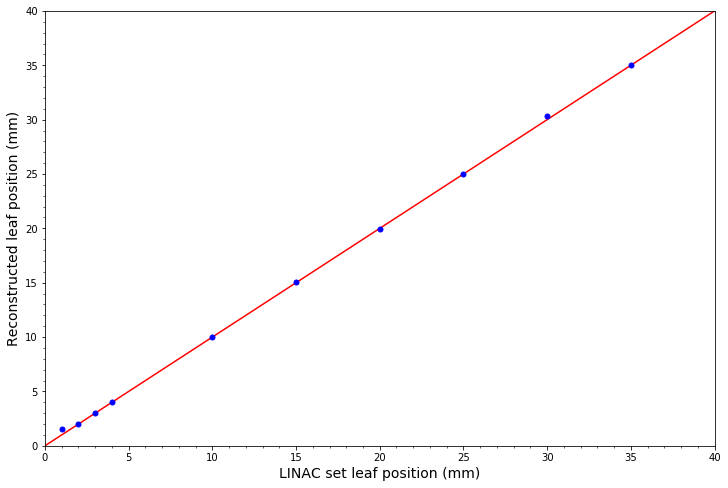

In [272]:
#plt.plot(np.sort(distances), np.array(avg)[np.argsort(distances)])
fig, ax = plt.subplots(figsize=(12,8))

ax.errorbar(np.sort(distances), np.array(avg)[np.argsort(distances)], 
                                np.array(std)[np.argsort(distances)], fmt='o',markersize=5, capsize=0, c='b',ecolor='b')
ax.plot(np.arange(0,50), np.arange(0,50),c='red')
#plt.xticks(np.arange(0,40,5))
#plt.yticks(np.arange(0,40,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel("Reconstructed leaf position (mm)", size=14)
ax.set_xlabel("LINAC set leaf position (mm)", size=14)
ax.set_xlim(0,40)
ax.set_ylim(0,40)
#plt.show()
plt.savefig("reconstructed_vs_true_linear.png")

In [138]:
std = std_unseen+std_test

In [181]:
resolutions = [0.04625, 0.04056, 0.08755, 0.04703, 0.04296, 0.04605,0.049,  0.04191, 0.05296, 0.04766 ]

In [179]:
bars = [0.00112, 0.00253, 0.00291, 0.00382, 0.00314, 0.00119,0.003,  0.00299, 0.00150, 0.00329]

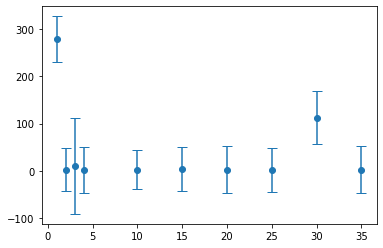

In [168]:
plt.errorbar(np.sort(distances), 
             np.array(errs)[np.argsort(distances)]*1000, 
             np.array(std)[np.argsort(distances)]*1000,
             fmt='o', capsize=5)
#plt.ylim(0,120)
plt.show()

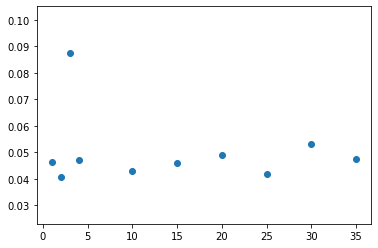

In [183]:
plt.scatter(np.sort(distances), resolutions)

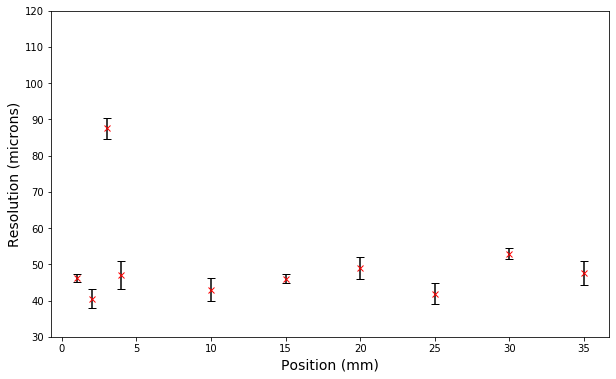

In [214]:
plt.figure(figsize=(10,6))
plt.errorbar(np.sort(distances), 
             np.array(resolutions)*1000, 
             np.array(bars)*1000,
             fmt='x', capsize=4, c='red',ecolor='k')
plt.xticks(np.arange(0,40,5))
plt.ylabel("Resolution (microns)", size=14)
plt.xlabel("Position (mm)", size=14)
plt.ylim(30,120)
plt.show()

In [218]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

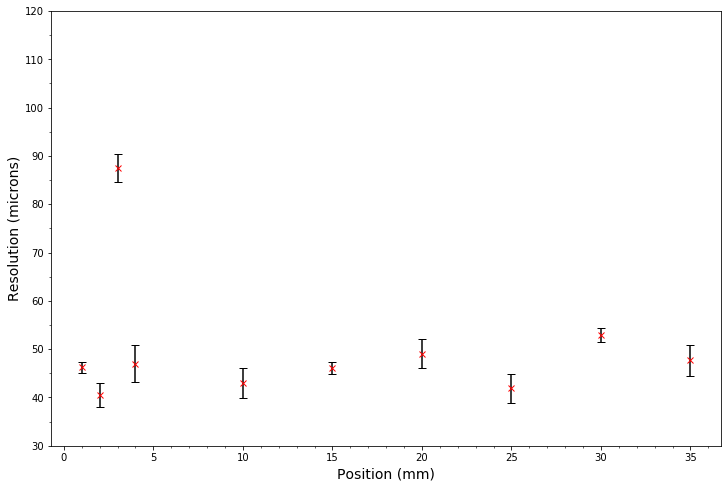

In [271]:
#plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(np.sort(distances), 
             np.array(resolutions)*1000, 
             np.array(bars)*1000,
             fmt='x', capsize=4, c='red',ecolor='k')
#ax.xticks(np.arange(0,40,5))
ax.set_ylabel("Resolution (microns)", size=14)
ax.set_xlabel("Position (mm)", size=14)
ax.set_ylim(30,120)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(5))
#plt.show()
plt.savefig("resolution_vs_position.png")